In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('suv_data.csv')


#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [2]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [4]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [5]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='manhattan', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [6]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [7]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

<ipython-input-8-f363d1875db7>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


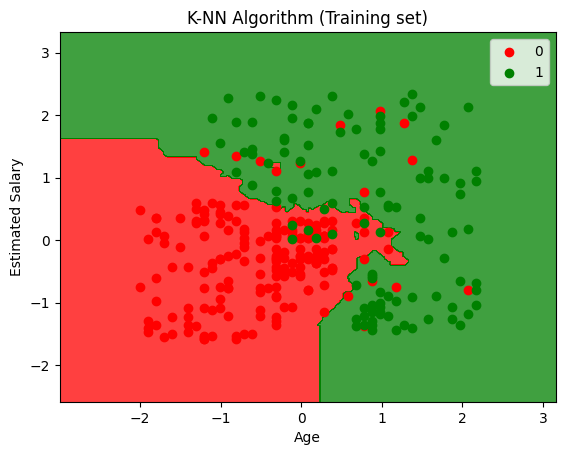

In [8]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

<ipython-input-9-1eca06fa12c2>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


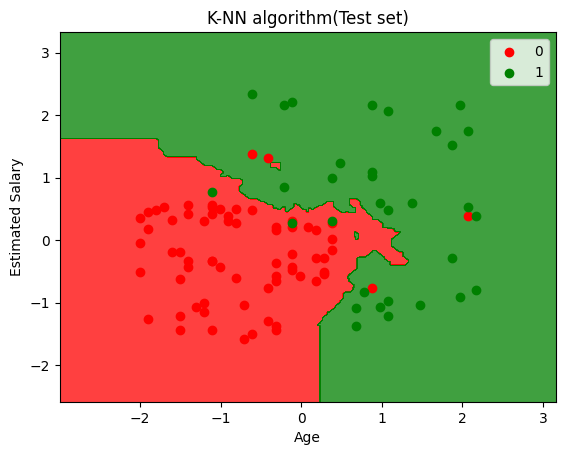

In [9]:
#Visualizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'y_test' and 'y_pred' are defined as the true and predicted labels, respectively.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625
F1-score: 0.8923076923076922
